<a href="https://colab.research.google.com/github/neerajgosai19/data-science/blob/master/Image_Compression_and_Color_Quantization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import urllib.request

In [2]:
import os
import cv2
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
bunny_image_url = "http://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Dataset/bunny.png"
urllib.request.urlretrieve(bunny_image_url , "bunny.png" )
im = cv2.imread("bunny.png")
im

array([[[ 26,  74,  58],
        [ 26,  72,  56],
        [ 26,  72,  56],
        ...,
        [ 20,  72,  54],
        [ 21,  73,  55],
        [ 22,  74,  56]],

       [[ 28,  73,  57],
        [ 27,  72,  56],
        [ 27,  72,  56],
        ...,
        [ 21,  73,  55],
        [ 22,  74,  56],
        [ 22,  75,  57]],

       [[ 26,  71,  55],
        [ 27,  71,  55],
        [ 27,  72,  56],
        ...,
        [ 21,  73,  55],
        [ 22,  74,  56],
        [ 22,  73,  55]],

       ...,

       [[225, 222, 214],
        [227, 224, 216],
        [226, 224, 215],
        ...,
        [215, 214, 200],
        [217, 214, 200],
        [218, 215, 201]],

       [[231, 229, 220],
        [232, 229, 221],
        [228, 226, 216],
        ...,
        [214, 213, 199],
        [215, 212, 198],
        [216, 213, 199]],

       [[229, 228, 218],
        [230, 229, 219],
        [226, 224, 214],
        ...,
        [214, 213, 199],
        [216, 213, 199],
        [216, 213, 199]]

Original size of bunny's image is: 630 Kilo Bytes


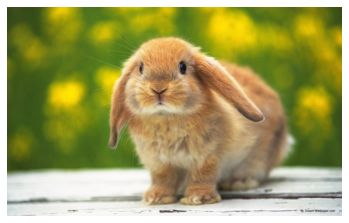

In [4]:
img_Corrected = cv2.cvtColor(im , cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img_Corrected)
print("Original size of bunny's image is: {} Kilo Bytes".format(str(math.ceil((os.stat('bunny.png').st_size)/1000))))

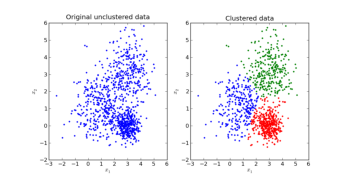

In [5]:
kmeans_url = "http://i.stack.imgur.com/cIDB3.png"
urllib.request.urlretrieve(kmeans_url , "K_Means_clustering.png")
kmeans_im_Read = cv2.imread("K_Means_clustering.png")
kmeans_Corrected = cv2.cvtColor(kmeans_im_Read , cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(kmeans_Corrected)

In [6]:
from sklearn.cluster import KMeans
import numpy as np

In [7]:
num_rows = im.shape[0]
num_cols = im.shape[1]
transform_image_for_KMeans = im.reshape(num_rows * num_cols, 3)

In [8]:
kmeans = KMeans(n_clusters= 8)
kmeans.fit(transform_image_for_KMeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [9]:
cluster_centroids = np.asarray(kmeans.cluster_centers_, dtype= np.uint8)
# labels represent the label of each pixel and which cluster it belongs to
labels = np.asarray(kmeans.labels_ , dtype= np.uint8)
labels = labels.reshape(num_rows,num_cols);
labels

array([[7, 7, 7, ..., 7, 7, 7],
       [7, 7, 7, ..., 7, 7, 7],
       [7, 7, 7, ..., 7, 7, 7],
       ...,
       [4, 4, 4, ..., 4, 4, 4],
       [4, 4, 4, ..., 4, 4, 4],
       [4, 4, 4, ..., 4, 4, 4]], dtype=uint8)

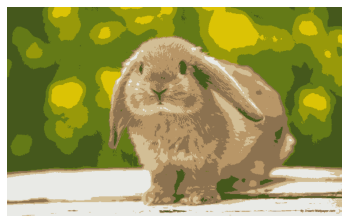

In [10]:
compressed_image = np.ones((num_rows, num_cols, 3), dtype=np.uint8)
for r in range(num_rows):
    for c in range(num_cols):
        compressed_image[r, c, :] = cluster_centroids[labels[r, c], :]
cv2.imwrite("compressed_bunny.png", compressed_image)
compressed_Bunny = cv2.imread("compressed_bunny.png")
compressed_image_bunny = cv2.cvtColor(compressed_Bunny , cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(compressed_image_bunny)

In [11]:
print("Compressed size of bunny's image is: {} Kilo Bytes".format(str(math.ceil((os.stat('compressed_bunny.png').st_size)/1000))))

Compressed size of bunny's image is: 47 Kilo Bytes


Original size of fish image is: 865 Kilo Bytes


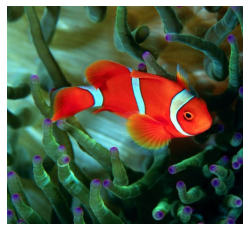

In [13]:
fish_image_url = "http://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Dataset/fish.png"
urllib.request.urlretrieve(fish_image_url, "fish.png") # downloads file as "fish.png"
im3 = cv2.imread("fish.png")
fish_im_corrected = cv2.cvtColor(im3, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(fish_im_corrected)
print("Original size of fish image is: {} Kilo Bytes".format(str(math.ceil((os.stat('fish.png').st_size)/1000))))

In [14]:
from sklearn.cluster import KMeans
import numpy as np
num_fish_row = im3.shape[0]
num_fish_col = im3.shape[1]
transform_fish_image_for_KMeans = im3.reshape(num_fish_row * num_fish_col, 3)
kmeans_fish = KMeans(n_clusters=10)

In [15]:
kmeans.fit(transform_fish_image_for_KMeans)
cluster_centroids = np.asarray( kmeans.cluster_centers_ , dtype= np.uint8)
labels = np.asarray(kmeans.labels_ , dtype= np.uint8)
labels = labels.reshape(num_fish_row,num_fish_col);

In [16]:
compressed_image_fish = np.ones((num_fish_row, num_fish_col , 3 ) , dtype= np.uint8 )
for r in range(num_fish_row):
  for c in range(num_fish_col):
    compressed_image_fish[r , c , :] = cluster_centroids[labels[r, c], :]

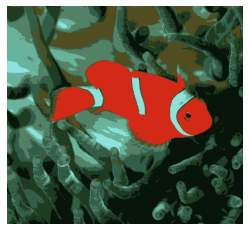

In [17]:
cv2.imwrite ("fish.png" ,compressed_image_fish )
compressed_fish_im = cv2.imread("fish.png")
compressed_fish_corrected = cv2.cvtColor(compressed_fish_im , cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(compressed_fish_corrected)

In [19]:
print("Compressed size of fish image is: {} Kilo Bytes".format(str(math.ceil((os.stat('fish.png').st_size)/1000))))

Compressed size of fish image is: 94 Kilo Bytes


Original size of butterfly image is: 1008 Kilo Bytes


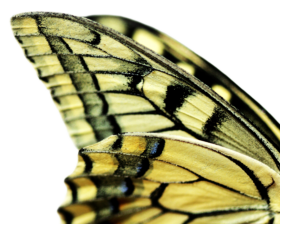

In [20]:
# We read a butterfly image here and display it
butterfly_image_url = "http://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Dataset/butterfly.png"
urllib.request.urlretrieve(butterfly_image_url, "butterfly.png") # downloads file as "butterfly.png"
im4 = cv2.imread("butterfly.png")
butterfly_im_corrected = cv2.cvtColor(im4, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(butterfly_im_corrected)
print("Original size of butterfly image is: {} Kilo Bytes".format(str(math.ceil((os.stat('butterfly.png').st_size)/1000))))

In [24]:
from sklearn.cluster import KMeans
import numpy as np


In [26]:
num_fly_row = im4.shape[0]
num_fly_col = im4.shape[1]
transfer_fly_image_kmeans = im.reshape(num_fly_row * num_fly_col, 3 )

ValueError: ignored